In [36]:
# In this notebook varya is trying (finally) to do spatial downscaling of the era5data over langtang

# this is an example for the little piece that has been cut out of the langtang area 
# important! DEM should be in [m] (UTM45 for langtang, check for other areas) 


In [2]:
# Load libraries

from TopoPyScale import topoclass as tc
from TopoPyScale import topo_plot as plot
import matplotlib.pyplot as plt

import pprint

import xarray as xr

In [3]:
# make config file
# load dem
# do dem things

In [4]:
# ========= STEP 1 ==========
# Load Configuration
config_file = './config_spatial.yml'
mp = tc.Topoclass(config_file)


---> Output directory cleaned
---> no FSM directory to clean
---> no ensemble directory to clean

---> DEM file found
{'latN': 28.273883510940188, 'latS': 28.135661088708204, 'lonW': 85.3313006867015, 'lonE': 85.58236263068083}
Project lat/lon extent:

	------------------------------
	|        North:28.3          |
	|West:85.3          East:85.6|
	|        South:28.1          |
	------------------------------


---> Loading ERA5 surf climate forcing
Start =  2020-Jan
End =  2020-Jan
ECWMF SURF data found:
0    SURF_202001.nc
Name: target_file, dtype: object


---> Loading ERA5 plev climate forcing
Start =  2020-Jan
End =  2020-Jan
ECWMF PLEV data found:
0    PLEV_202001.nc
Name: target_file, dtype: object


## print out configurations 

In [5]:
# Print out config
print('--------- Project Configuration ------')
pprint.pprint(mp.config.project)
print('\n')
print('--------- Climate Data Configuration ------')
pprint.pprint(mp.config.climate)
print('\n')
print('--------- DEM Data Configuration ------')
pprint.pprint(mp.config.dem)
print('\n')
print('--------- Sampling Configuration ------')
pprint.pprint(mp.config.sampling)
print('\n')
print('--------- toposcale Configuration ------')
pprint.pprint(mp.config.sampling)
print('\n')
print('--------- Outputs Configuration ------')
pprint.pprint(mp.config.outputs)
print('\n')

--------- Project Configuration ------
{'CPU_cores': 8,
 'authors': ['Filhol S.',
             'Aalstad K.',
             'Fiddes J.',
             DefaultMunch({}, {'adjusted': 'bazilova v'})],
 'climate': 'era5',
 'date': 'Feb 2024',
 'description': 'Downscaling for Finse, Benchmarking TopoPyScale',
 'directory': './',
 'end': datetime.date(2020, 1, 30),
 'extent': {'latN': 28.273883510940188,
            'latS': 28.135661088708204,
            'lonE': 85.58236263068083,
            'lonW': 85.3313006867015},
 'name': 'Langtang',
 'split': DefaultMunch({}, {'IO': False, 'time': 1, 'space': 'None'}),
 'start': datetime.date(2020, 1, 1)}


--------- Climate Data Configuration ------
{'era5': {'download_threads': 17,
          'path': 'inputs/climate/',
          'plevels': [350,
                      400,
                      450,
                      500,
                      550,
                      600,
                      650,
                      700,
                     

## load climate and plot it to check the extent 

86.35

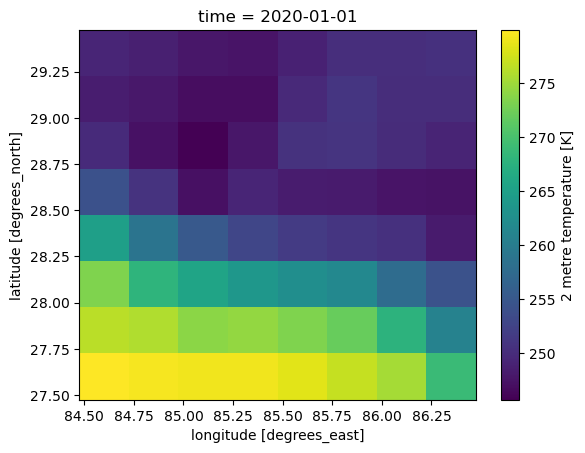

In [6]:
plotclimate = xr.open_dataset('inputs/climate/SURF_202001.nc')
plotclimate.isel(time=0).t2m.plot()

plotclimate.longitude.values.max()

## 1.2. Load DEM and Compute Morphometrics


In [7]:
%%time 
# Load DEM and derive terrain parameters
mp.compute_dem_param()


---> No ds_param.nc Dataset found. DEM .//inputs/dem/langtangish_dem_32645_clip2.tif available.

---> Extracting DEM parameters (slope, aspect, svf)
Computing slope and aspect ...
Computing svf ...
---> File outputs/ds_param.nc saved
CPU times: user 13.4 s, sys: 660 ms, total: 14.1 s
Wall time: 15.1 s


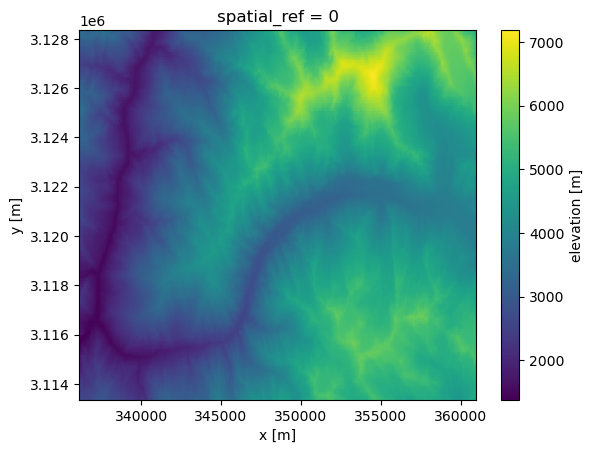

In [8]:
mp.toposub.ds_param.elevation.plot()


## 1.3. Segment DEM in Clusters


In [9]:
mp.extract_topo_param()


---> Scaling data prior to clustering
---> Clustering with Mini-Batch K-means in 10 clusters
---> Mini-Batch Kmean finished in 0.0s
---> File outputs/ds_param.nc saved
Convert coordinates from EPSG:32645 to EPSG:4326
---> Centroids file df_centroids.pck saved


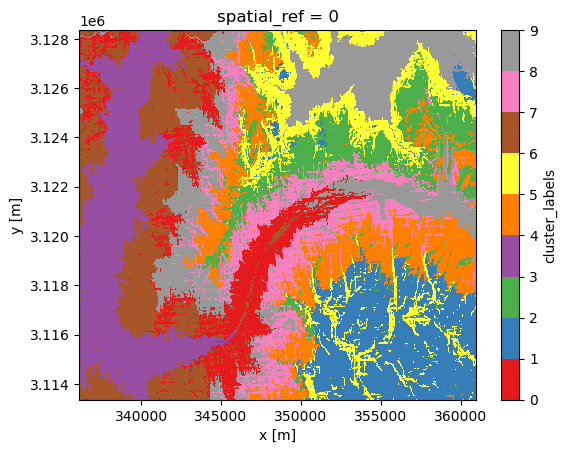

In [10]:
mp.toposub.ds_param.cluster_labels.plot(cmap=plt.cm.Set1)


In [11]:
print('Dataframe containing clusters average properties:\n')
mp.toposub.df_centroids

Dataframe containing clusters average properties:



,x,y,elevation,slope,aspect_cos,aspect_sin,svf,spatial_ref,aspect,cluster_labels,point_name,point_ind,lon,lat
0,344733.753421,3.120256e+06,3072.924123,0.805729,0.045651,-0.002825,0.645575,0.0,3.026951,0,0,0,85.418044,28.198961
1,355750.429321,3.116380e+06,5146.210814,0.428680,-0.108585,0.178202,0.861568,0.0,2.886403,1,1,1,85.530736,28.165242
2,353401.838744,3.123239e+06,4641.603133,0.573884,0.570133,0.221600,0.794601,0.0,2.869361,2,2,2,85.505961,28.226878
3,338945.759821,3.120244e+06,2018.535193,0.657596,-0.015269,-0.009245,0.719043,0.0,3.060225,3,3,3,85.359093,28.198164
4,352192.915217,3.120546e+06,4408.587611,0.479236,-0.663512,-0.076805,0.831444,0.0,3.260734,4,4,4,85.493984,28.202443
5,352967.330204,3.122866e+06,5227.629766,0.865810,0.121323,-0.315370,0.712191,0.0,3.823571,5,5,5,85.501581,28.223464
6,340727.313688,3.120994e+06,2819.140049,0.541421,-0.153099,-0.346424,0.844146,0.0,3.827299,6,6,6,85.377137,28.205147
7,349743.215132,3.120275e+06,3983.095334,0.829963,-0.011694,-0.199358,0.679630,0.0,3.591377,7,7,7,85.469066,28.199713
8,354682.590822,3.126689e+06,6109.817775,0.791332,0.106432,0.088933,0.773121,0.0,2.969907,8,8,8,85.518579,28.258153
9,348340.811808,3.120922e+06,3711.840196,0.480243,0.155395,-0.411041,0.833127,0.0,4.068871,9,9,9,85.454698,28.205392


## 1.4. Compute Solar Geometry


In [12]:
mp.compute_solar_geometry()



---> Computing solar geometry
---> File outputs/ds_solar.nc saved


In [13]:
mp.ds_solar


<xarray.Dataset>
Dimensions:         (point_name: 10, time: 720)
Coordinates:
  * point_name      (point_name) object '0' '1' '2' '3' '4' '5' '6' '7' '8' '9'
  * time            (time) datetime64[ns] 2020-01-01 ... 2020-01-30T23:00:00
    reference_time  datetime64[ns] 2020-01-01
Data variables:
    zenith          (point_name, time) float64 1.835 1.62 1.417 ... 2.29 2.059
    azimuth         (point_name, time) float64 -1.25 -1.139 ... -1.584 -1.467
    elevation       (point_name, time) float64 -0.2638 -0.0493 ... -0.4885
    mu0             (point_name, time) float64 -0.0 -0.0 0.153 ... -0.0 -0.0
    SWtoa           (point_name, time) float64 -0.0 -0.0 209.6 ... -0.0 -0.0
    sunset          (point_name, time) bool True True False ... True True True

Text(0.5, 1.0, 'Solar Zenith')

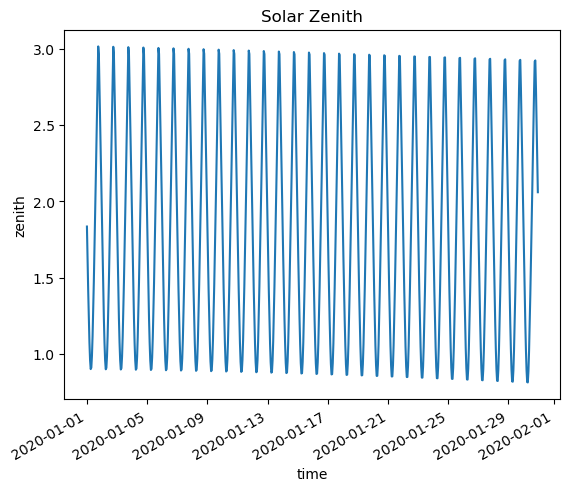

In [14]:
# mp.ds_solar.zenith.sel(point_id=1).plot()
# plt.title('Solar Zenith')

mp.ds_solar.zenith.isel(point_name=0).plot()
plt.title('Solar Zenith')

## 1.5. Compute Horizon Angles


In [15]:
%%time
mp.compute_horizon()



---> Computing horizons with 10 degree increments
---> File outputs/da_horizon.nc saved
---> Centroids file df_centroids.pck updated with horizons
CPU times: user 8.83 s, sys: 1.03 s, total: 9.86 s
Wall time: 9.79 s


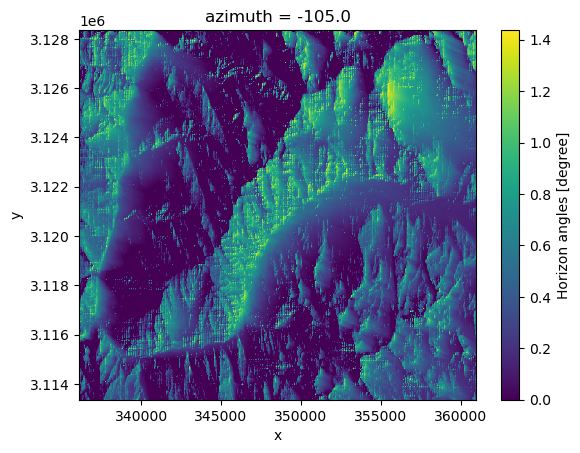

In [16]:
mp.da_horizon.isel(azimuth=7).plot()


## 1.6. Downscale Climate to Clusters


In [17]:
mp.downscale_climate()



-------------------------------------------------
           TopoScale - Downscaling

---> Downscaling climate to list of points using TopoScale
outputs/tmp cleaned
No ERA5T  PRESSURE data present with additional dimension <expver>
Preparing plev for point 0
Preparing plev for point 1
Preparing plev for point 2
Preparing plev for point 3
Preparing plev for point 4
Preparing plev for point 5
Preparing plev for point 6
Preparing plev for point 7
Preparing plev for point 8
Preparing plev for point 9
No ERA5T  PRESSURE data present with additional dimension <expver>
Preparing surf for point 0
Preparing surf for point 1
Preparing surf for point 2
Preparing surf for point 3
Preparing surf for point 4
Preparing surf for point 5
Preparing surf for point 6
Preparing surf for point 7
Preparing surf for point 8
Preparing surf for point 9
Downscaling t,q,p,tp,ws, wd for point: 4
precip lapse rate = False
---> Storing point 4 to outputs/tmp/
Downscaling t,q,p,tp,ws, wd for point: 2
precip lapse ra

In [18]:
mp.downscaled_pts # this is the result per clusted stored as xarray dataset 

<xarray.Dataset>
Dimensions:            (time: 720, point_name: 10)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-01 ... 2020-01-30T23:00:00
  * point_name         (point_name) <U1 '0' '1' '2' '3' '4' '5' '6' '7' '8' '9'
    reference_time     datetime64[ns] 2020-01-01
Data variables: (12/17)
    t                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    u                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    v                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    q                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    p                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    precip_lapse_rate  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    ...                 ...
    cse                (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    LW                 (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    SW_diffuse         (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    cos_illumination   (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    SW_direct          (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    SW                 (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
Attributes:
    title:            Downscaled timeseries with TopoPyScale
    created with:     TopoPyScale, see more at https://topopyscale.readthedoc...
    package_version:  0.2.5
    git_commit:       41b66fab92925cf22a9876283efd8fff4fa4e1c5
    url_TopoPyScale:  https://github.com/ArcticSnow/TopoPyScale
    date_created:     2024/03/05 17:25:12

In [19]:
mp.toposub.ds_param.groupby

# groupby the cluster labels or elevation or smth to get some statistics on clusters 
# table with the centroid 

<bound method Dataset.groupby of <xarray.Dataset>
Dimensions:         (y: 500, x: 828)
Coordinates:
  * x               (x) float64 3.361e+05 3.362e+05 ... 3.609e+05 3.609e+05
  * y               (y) float64 3.128e+06 3.128e+06 ... 3.113e+06 3.113e+06
    spatial_ref     int64 0
Data variables:
    elevation       (y, x) float32 3.225e+03 3.226e+03 ... 4.769e+03 4.76e+03
    slope           (y, x) float32 0.7512 0.6921 0.6873 ... 0.4319 0.5411 0.6312
    aspect          (y, x) float32 3.177 3.668 4.203 ... 0.8623 0.5881 0.4229
    aspect_cos      (y, x) float32 -0.9994 -0.8645 -0.4873 ... 0.832 0.9119
    aspect_sin      (y, x) float32 -0.0357 -0.5027 -0.8732 ... 0.5548 0.4104
    svf             (y, x) float64 0.8298 0.8545 0.8471 ... 0.9245 0.9129 0.8881
    cluster_labels  (y, x) int64 6 6 6 6 6 6 6 6 6 6 0 ... 1 1 1 1 1 1 1 1 1 1 1
    point_name      (y, x) object '6' '6' '6' '6' '6' ... '1' '1' '1' '1' '1'
    point_ind       (y, x) int64 6 6 6 6 6 6 6 6 6 6 0 ... 1 1 1 1 1 1 1 1

In [20]:
mp.downscaled_pts

<xarray.Dataset>
Dimensions:            (time: 720, point_name: 10)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-01 ... 2020-01-30T23:00:00
  * point_name         (point_name) <U1 '0' '1' '2' '3' '4' '5' '6' '7' '8' '9'
    reference_time     datetime64[ns] 2020-01-01
Data variables: (12/17)
    t                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    u                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    v                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    q                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    p                  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    precip_lapse_rate  (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    ...                 ...
    cse                (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    LW                 (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    SW_diffuse         (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    cos_illumination   (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    SW_direct          (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
    SW                 (point_name, time) float64 dask.array<chunksize=(1, 720), meta=np.ndarray>
Attributes:
    title:            Downscaled timeseries with TopoPyScale
    created with:     TopoPyScale, see more at https://topopyscale.readthedoc...
    package_version:  0.2.5
    git_commit:       41b66fab92925cf22a9876283efd8fff4fa4e1c5
    url_TopoPyScale:  https://github.com/ArcticSnow/TopoPyScale
    date_created:     2024/03/05 17:25:12

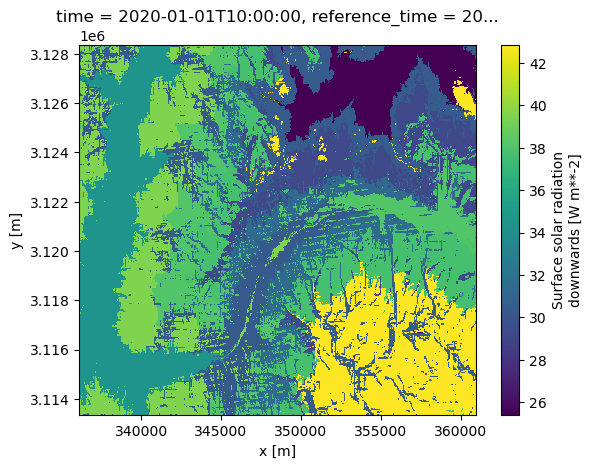

In [21]:
mp.downscaled_pts.isel(time = 10).SW.sel(point_name=mp.toposub.ds_param.point_name).plot()

In [34]:
# mp.toposub.ds_param

In [35]:
# pip install TopoPyScale